In [1]:
! ./fpy.sh langanLib langan.f90
import matplotlib.pyplot as plt
import numpy as np
import langanLib
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib notebook
%matplotlib notebook


def binMatrix(arr, new_shape):
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
            new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)


running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "langanLib" sources
f2py options: []
f2py:> /tmp/tmp4e8qoa_r/src.linux-x86_64-3.6/langanLibmodule.c
creating /tmp/tmp4e8qoa_r/src.linux-x86_64-3.6
Reading fortran codes...
	Reading file 'langan.f90' (format:free)
Post-processing...
	Block: langanLib
			Block: langan
In: :langanLib:langan.f90:langan
get_parameters: got "name 'atan' is not defined" on '4*atan(1.0)'
				Block: initializegrid
{'attrspec': ['intent(in)']}
In: :langanLib:langan.f90:langan:muvector
vars2fortran: No typespec for argument "t".
				Block: muvector
				Block: islandradius
				Block: torque
				Block: torquelandau
				Block: random_test
				Block: kinetic
				Block: hamxy
				Block: anchor
				Block: init_random_seed
				Block: update
				Block: unique


compiling Fortran sources
Fortran f77 compiler: /usr/bin/gfortran -Wall -g -ffixed-form -fno-second-underscore -fPIC -O3 -funroll-loops
Fortran f90 compiler: /usr/bin/gfortran -Wall -g -fno-second-underscore -fPIC -O3 -funroll-loops
Fortran fix compiler: /usr/bin/gfortran -Wall -g -ffixed-form -fno-second-underscore -Wall -g -fno-second-underscore -fPIC -O3 -funroll-loops
compile options: '-I/tmp/tmp4e8qoa_r/src.linux-x86_64-3.6 -I/home/rings/anaconda3/lib/python3.6/site-packages/numpy/core/include -I/home/rings/anaconda3/include/python3.6m -c'
extra options: '-J/tmp/tmp4e8qoa_r/ -I/tmp/tmp4e8qoa_r/'
gfortran:f90: /tmp/tmp4e8qoa_r/src.linux-x86_64-3.6/langanLib-f2pywrappers2.f90
/usr/bin/gfortran -Wall -g -Wall -g -shared /tmp/tmp4e8qoa_r/tmp/tmp4e8qoa_r/src.linux-x86_64-3.6/langanLibmodule.o /tmp/tmp4e8qoa_r/tmp/tmp4e8qoa_r/src.linux-x86_64-3.6/fortranobject.o /tmp/tmp4e8qoa_r/langan.o /tmp/tmp4e8qoa_r/tmp/tmp4e8qoa_r/src.linux-x86_64-3.6/langanLib-f2pywrappers2.o -L/usr/lib/gcc/x86_6

In [2]:
%matplotlib notebook
n = 100
kappa = .1
mu = .01
beta = 2
lnoise = np.sqrt(12./beta)
grid = np.zeros([n,n], order = 'f')
langanLib.langan.init_random_seed()
langanLib.langan.initializegrid(grid)

10.0
333


<IPython.core.display.Javascript object>


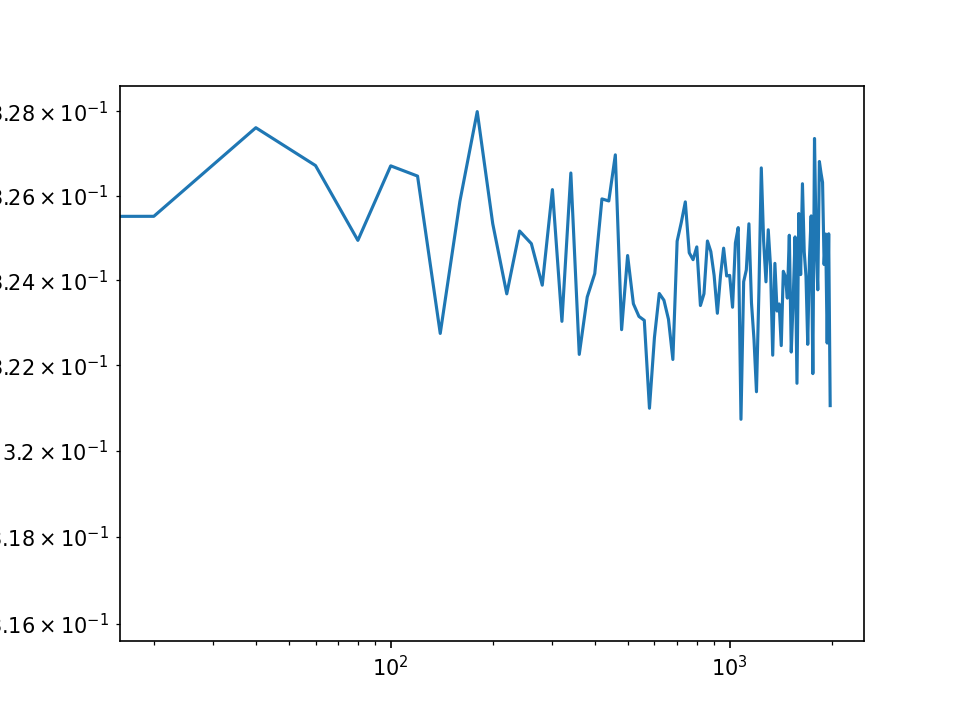

In [37]:
lgrid = []
lham = []
dh = []

n = 100
kappa = 50
mu = 0.5
beta = .001
alpha = 1
lnoise = np.sqrt(12./beta)
langanLib.langan.initializegrid(grid)
ngrid=grid
interations = 2000
plots = 6
div = int(interations/plots)

print(np.sqrt(kappa/mu))
print(div)
for t in np.arange(interations):
    grid = ngrid
    [ngrid,hgrid]=langanLib.langan.update(grid,lnoise,kappa, mu,n,alpha)
    if(t%(interations/100)) == 0:
        
        dh.append([t,np.sqrt(np.mean( (ngrid-grid)**2))])
    if (t%div) == 0:
        lgrid.append(ngrid)
        lham.append(hgrid)
dh = np.array(dh).T
fig,ax = plt.subplots()
ax.loglog(dh[0],dh[1])
endgrid=grid

<IPython.core.display.Javascript object>


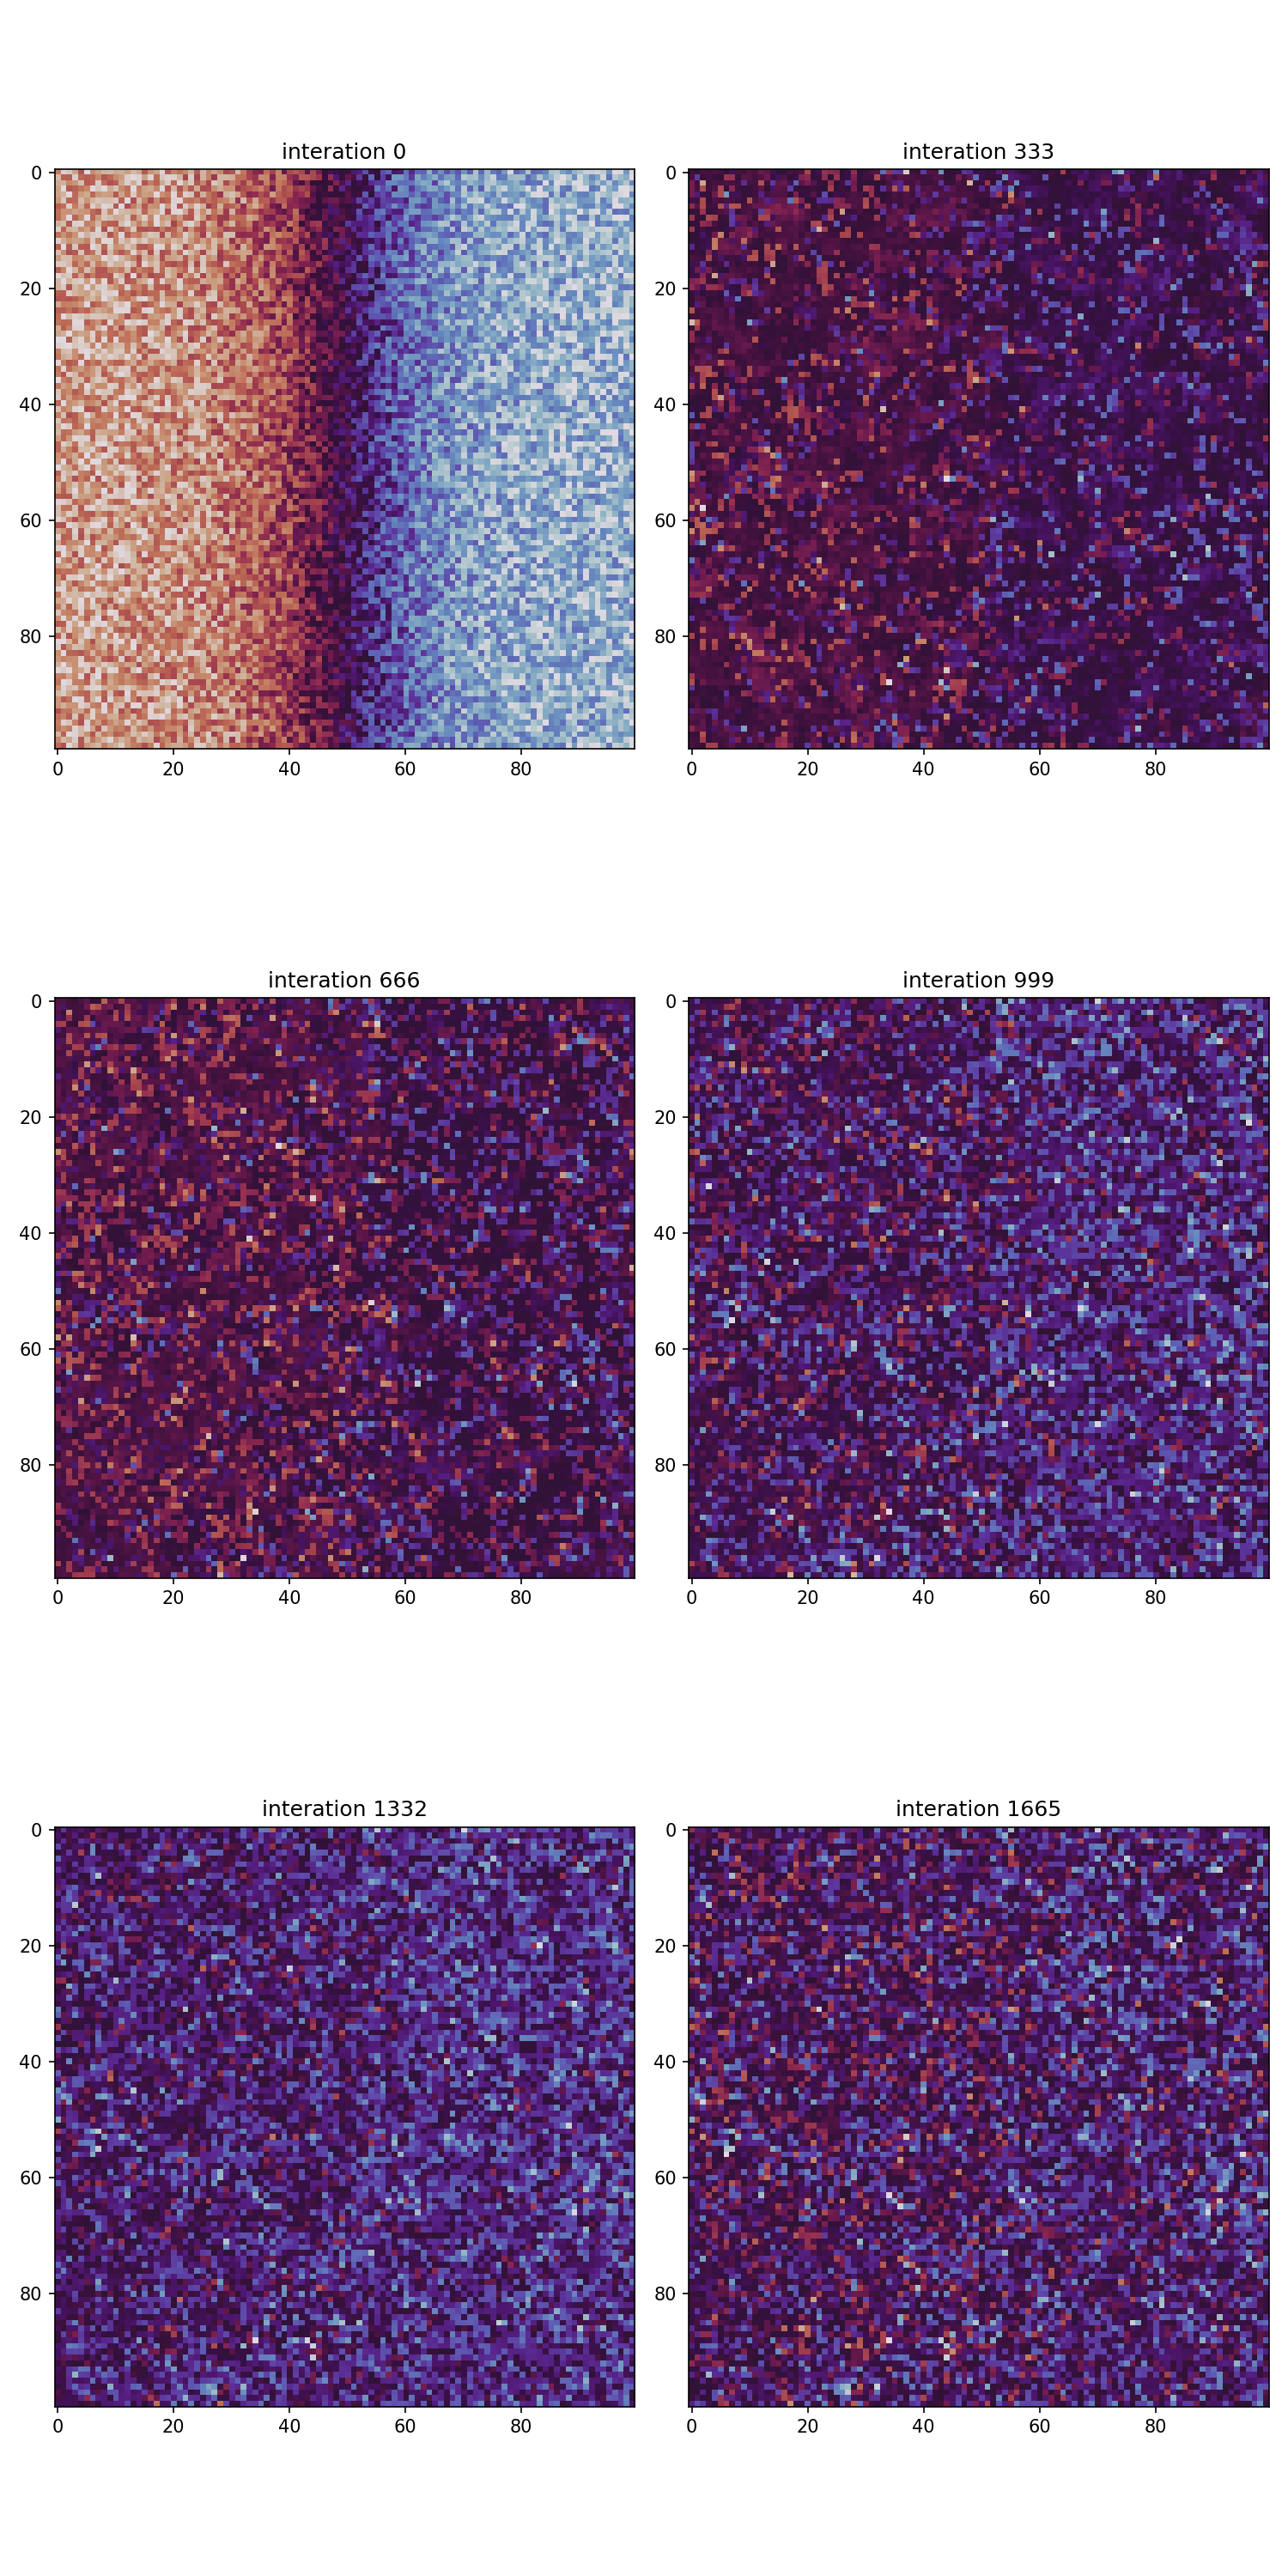

0
1
2
3
4
5


In [38]:
fig,ax = plt.subplots(ncols=2,nrows=3,figsize = (10,20))
for i,a in enumerate(ax.ravel()):
    print(i)
    a.imshow(lgrid[i].T, cmap='twilight')
    a.set_title('interation {}'.format(i*div))
plt.tight_layout()

10.0
333


<IPython.core.display.Javascript object>


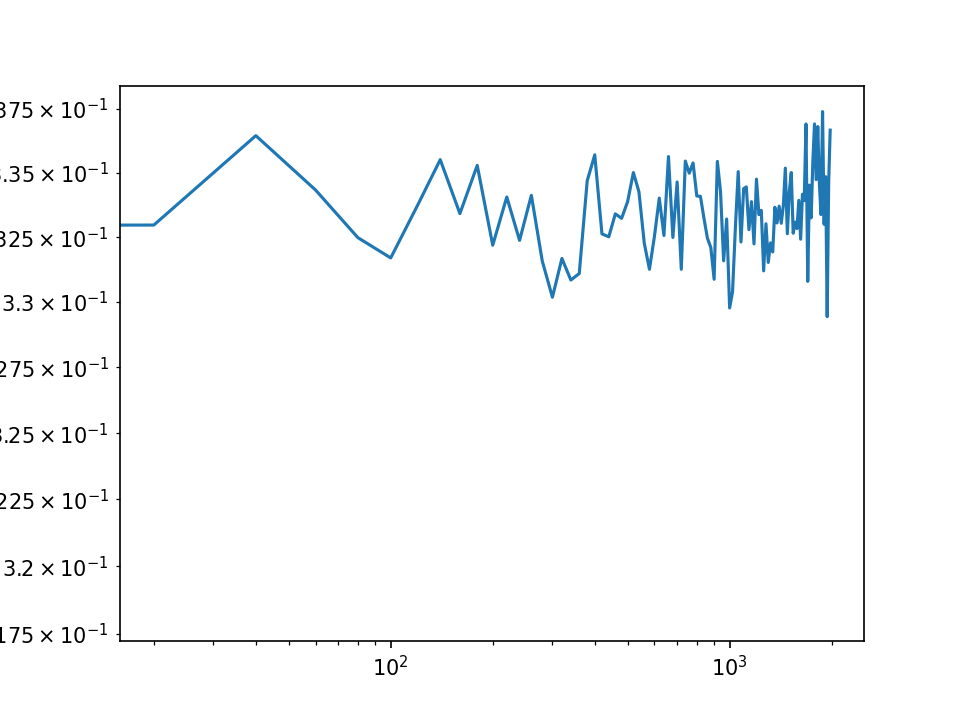

In [39]:
lgrid_z = []
lham_z = []
dh_z = []

n = 100
kappa = 50
mu = 0.5
beta = .001
alpha = 0
lnoise = np.sqrt(12./beta)
grid_z = np.zeros([n,n], order ='f')
langanLib.langan.initializegrid(grid_z)
ngrid_z=grid_z
interations = 2000
plots = 6
div = int(interations/plots)

print(np.sqrt(kappa/mu))
print(div)
for t in np.arange(interations):
    grid_z = ngrid_z
    [ngrid_z,hgrid_z]=langanLib.langan.update(grid_z,lnoise,kappa, mu,n,alpha)
    if(t%(interations/100)) == 0:
        
        dh_z.append([t,np.sqrt(np.mean( (ngrid_z-grid_z)**2))])
    if (t%div) == 0:
        lgrid_z.append(ngrid_z)
        lham_z.append(hgrid_z)
dh = np.array(dh_z).T
fig,ax = plt.subplots()
ax.loglog(dh[0],dh[1])
endgrid=grid

In [40]:
len(lgrid_z)

7

<IPython.core.display.Javascript object>


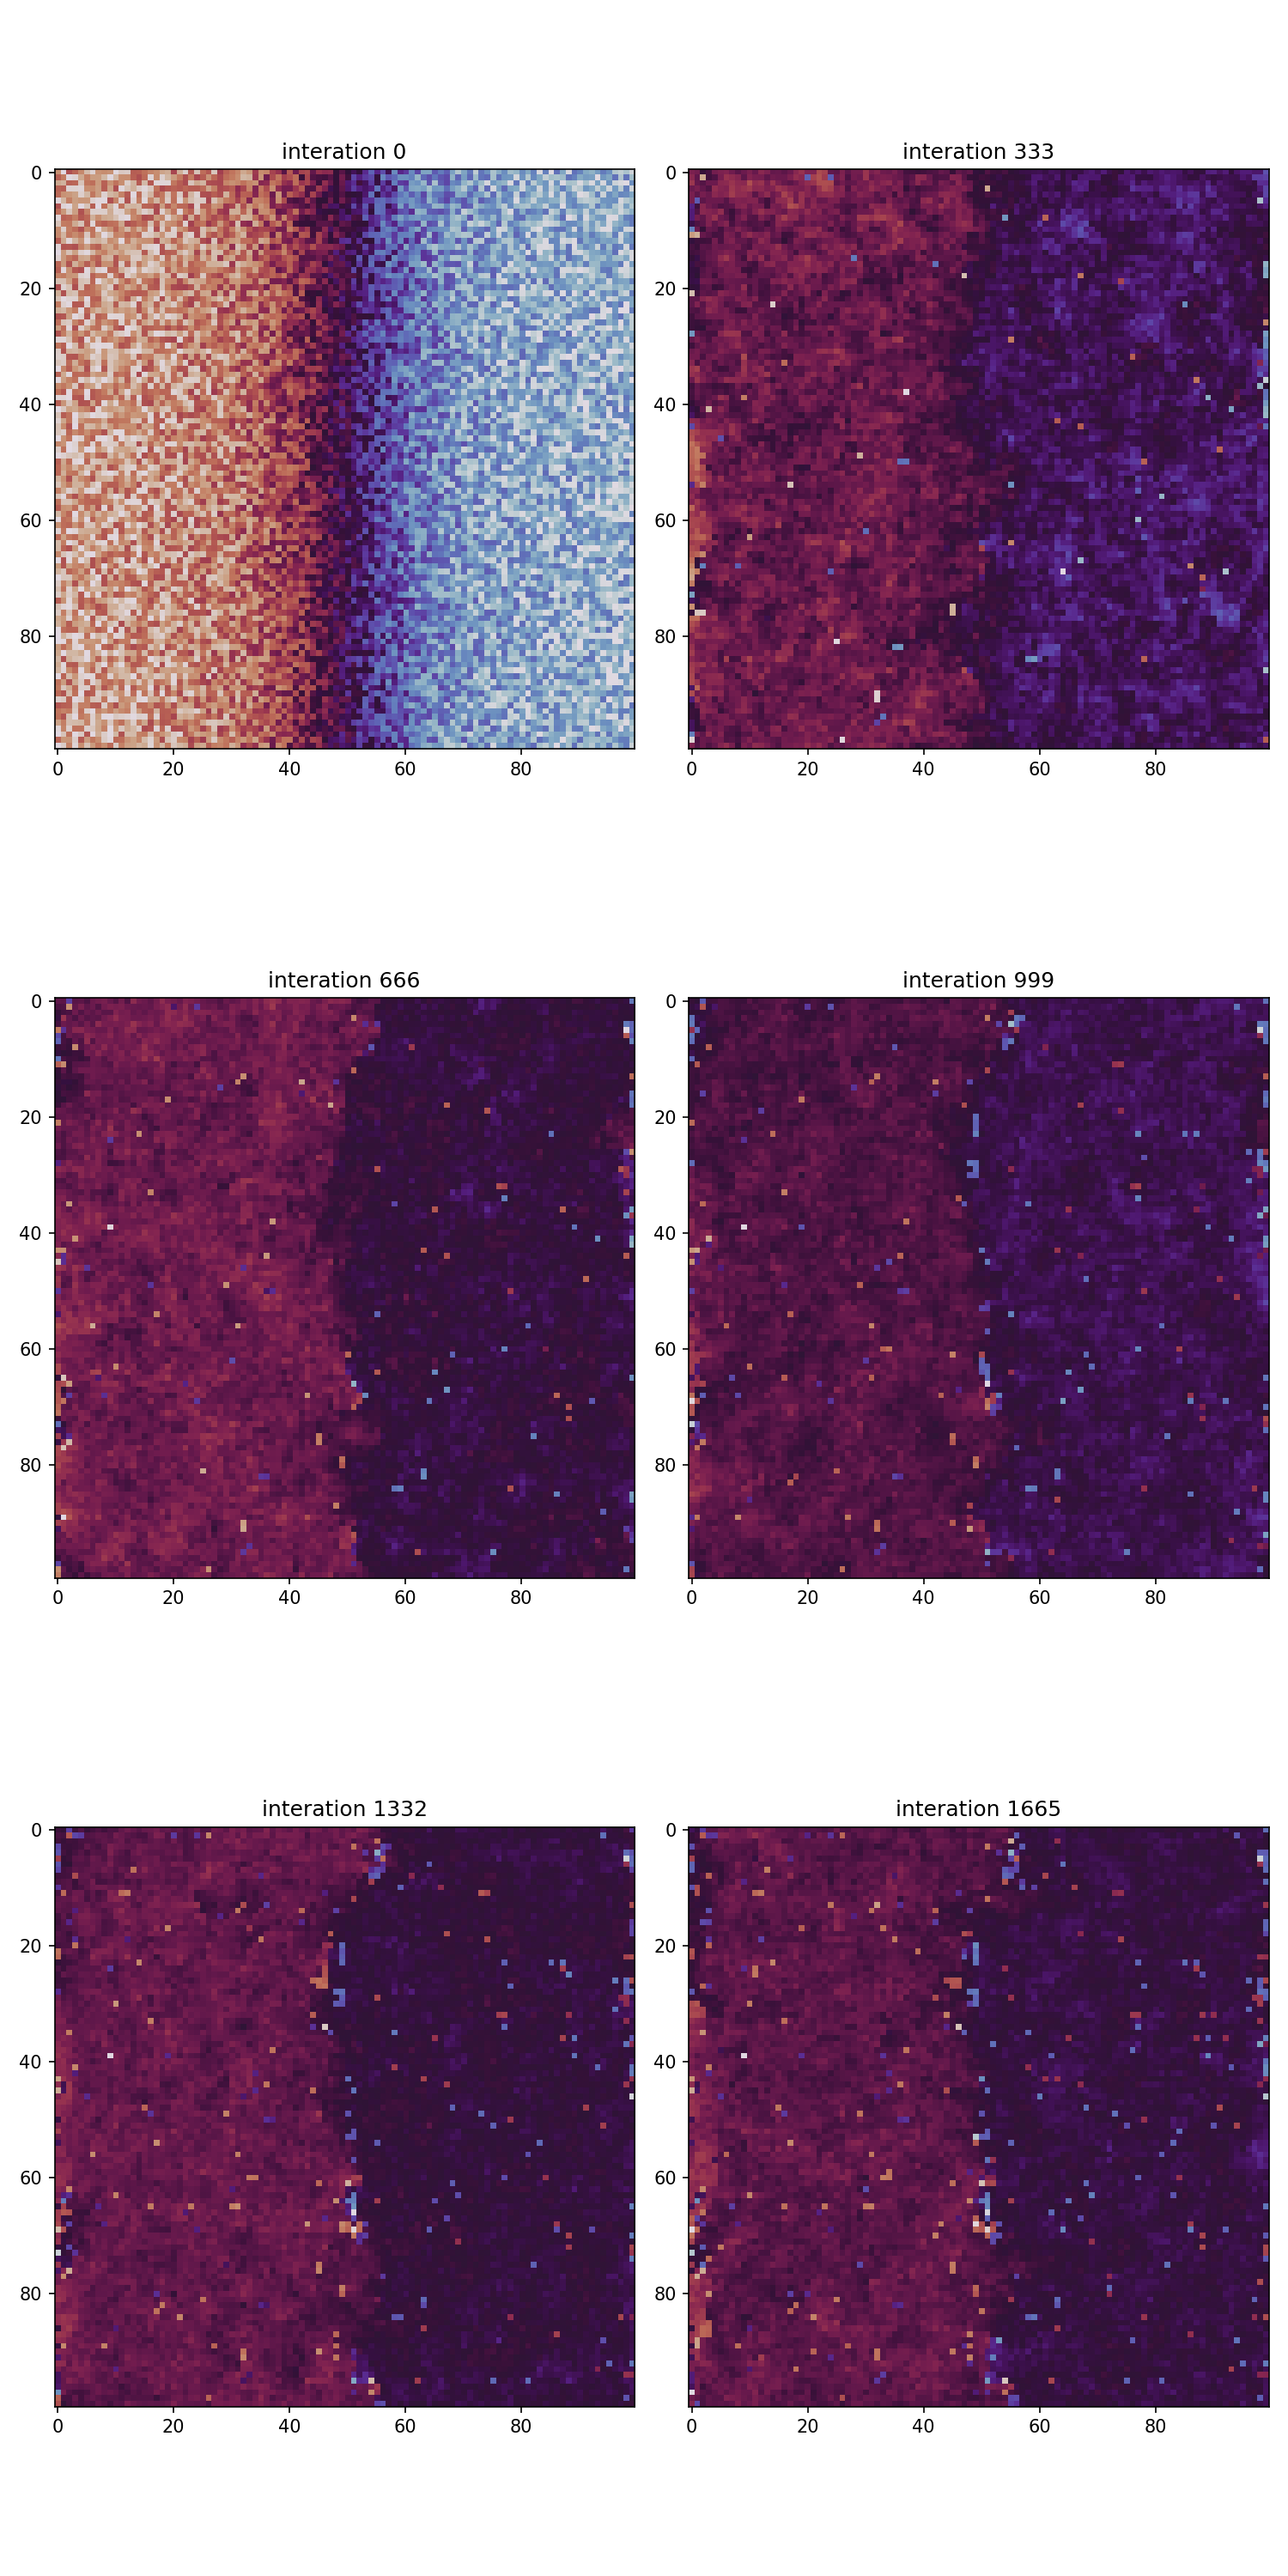

0
1
2
3
4
5


In [41]:
fig,ax = plt.subplots(ncols=2,nrows=3,figsize = (10,20))
for i,a in enumerate(ax.ravel()):
    print(i)
    a.imshow(lgrid_z[i].T, cmap='twilight')
    a.set_title('interation {}'.format(i*div))
plt.tight_layout()